<a href="https://colab.research.google.com/github/pdrzxzz/machine-learning/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [63]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine-Learning-A-Z-Codes-Datasets/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 2:].values

In [64]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [75]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y)

In [77]:
scaled_X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [78]:
scaled_y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [79]:
from sklearn import svm
regressor = svm.SVR(kernel='rbf') # rbf is the default, but i want it to be explicit set here.
regressor.fit(scaled_X, scaled_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting


### For a specified value

In [80]:
std_prediction = regressor.predict(sc_X.transform([[6.5]]))
std_prediction
# predict the salary in terms of standardized y

array([-0.27861589])

In [81]:
sc_y.inverse_transform([std_prediction])
# reverses the standardization for real result

array([[170370.0204065]])

For all the data

In [90]:
y_preds = sc_y.inverse_transform([regressor.predict(scaled_X)])
y_preds = y_preds.reshape(-1, 1)
y_preds

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

## Visualising the SVR results

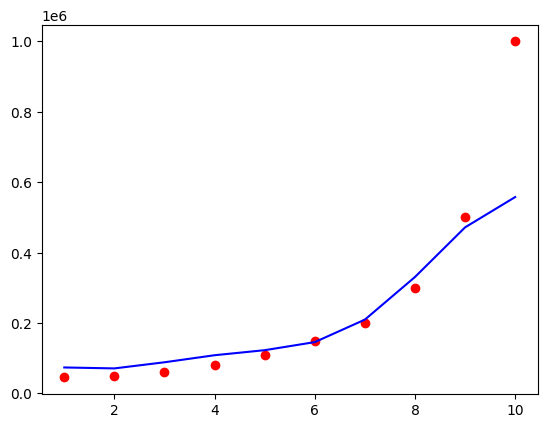

In [91]:
plt.scatter(X, y, color="red")
plt.plot(X, y_preds, color="blue")

## Smoother curve

In [121]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)
X_grid[:5], X_grid[-5:]

<ipython-input-121-cbc916ef2f4e>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


(array([[1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4]]),
 array([[9.5],
        [9.6],
        [9.7],
        [9.8],
        [9.9]]))

In [122]:
y_preds_grid = sc_y.inverse_transform([regressor.predict(sc_X.transform(X_grid))]).reshape(-1, 1)
y_preds_grid[:5], y_preds_grid[-5:]

(array([[73474.15615697],
        [71922.03659018],
        [70670.99294089],
        [69718.75598421],
        [69060.84136608]]),
 array([[525887.86348246],
        [534245.01083923],
        [541650.57173175],
        [548066.807448  ],
        [553464.21233975]]))

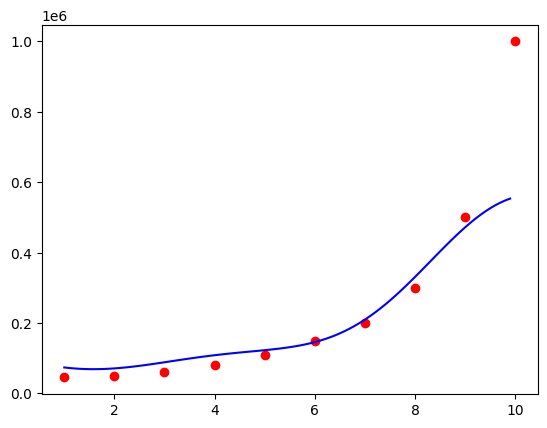

In [123]:
plt.scatter(X, y, color="red")
plt.plot(X_grid, y_preds_grid, color="blue")